Предполагается, что в рамках данного задания ученики сами будут изучать документацию, как минимум используя функционал `tab` и `shift+tab` от Jupyter

1. Импортируйте библиотеку pandas
2. Считайте файл `wage.csv` в DataFrame с названием `wage`. Используйте для этого функцию pd.read_csv()

`person_id` - идентификатор человека

`gender` - пол, 0 - женский, 1 - мужской

`wage` - заработная плата в рублях

In [83]:
import pandas as pd

In [84]:
df=pd.read_csv('/content/wage.csv')
df.head(10)

,person_id,gender,wage
0,0,1,46793.60
1,1,1,33481.58
2,2,1,44523.70
3,3,1,15995.58
4,4,0,10282.63
5,5,1,65464.53
6,6,1,35395.17
7,7,1,139610.85
8,8,1,54813.51
9,9,1,12196.08


In [85]:
# Устанавливаем формат отображения float с определенным количеством знаков после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

3. Поменяйте колонку `gender` так, чтобы были записи `F` (female) и `M` (male) вместо 0 и 1

In [86]:
df['gender'] = df['gender'].replace({0: 'F', 1: 'M'})

#df_wage['gender'] = df_wage['gender'].apply(lambda x: 'M' if x == 1 else 'F')

display(df.head())

,person_id,gender,wage
0,0,M,46793.60
1,1,M,33481.58
2,2,M,44523.70
3,3,M,15995.58
4,4,F,10282.63


4. Давайте посчитаем среднюю зарплату у мужчин и женщин. Для этого используйте метод `groupby` со следующим синтаксисом:

`dataframe.groupby(Название_колонки_для_группировки)[Перечисление_колонок_для_агрегации].функция_агрегации()`

In [87]:
average_wage_by_gender = df.groupby('gender')['wage'].mean()
display(average_wage_by_gender)

,wage
gender,
F,40855.75
M,46815.94


5. Теперь взглянем внимательнее на данные и обнаружим, что некоторые люди попали в выборку несколько раз.
    1. Найдите таких людей. Подсказка: `value_counts()`
    0. Убедитесь, что записи по ним с одинаковым `wage`. Возможно, тут вам пригодится функция агрегации `nunique()`, отображающая количество разных значений
    0. Избавьтесь от повторяющихся значений. Подсказка: `drop_duplicates()`

In [112]:
# 5.1 Найдите людей, которые попали в выборку несколько раз
duplicate_counts = df['person_id'].value_counts()
duplicated_people = duplicate_counts[duplicate_counts > 1]
print("Люди с дублирующимися записями:")
print(duplicated_people)



# 5.2 Убедитесь, что записи по ним с одинаковым wage
# Группируем по person_id и проверяем количество уникальных значений wage
wage_check = df.groupby('person_id')['wage'].agg(['count', 'nunique']).reset_index()
wage_check = wage_check[wage_check['count'] > 1]
print("\nПроверка wage для дублирующихся записей:")
print(wage_check)

# Группируем по person_id и проверяем, есть ли более чем один уникальный wage для каждой группы
wage_variation = df.groupby('person_id')['wage'].nunique()

# Проверяем, есть ли хоть одна группа, у которой более одного уникального значения wage
exists_variation = (wage_variation > 1).any()

if exists_variation:
    print("Такие люди существуют: у некоторых person_id значения wage различаются.")
else:
    print("Такие люди не обнаружены: при равном person_id значение wage всегда одно.")


# 5.3 Избавьтесь от повторяющихся значений
# Удаляем дубликаты, оставляя первую запись для каждого person_id
print(f"\nДо удаления дубликатов в таблице  {len(df)} записей")
df = df.drop_duplicates(subset='person_id', keep='first')
print(f"\nПосле удаления дубликатов в таблице осталось {len(df)} записей")


# Проверяем, что дубликатов больше нет
final_check = df['person_id'].value_counts()
remaining_duplicates = final_check[final_check > 1]
print(f"Осталось дублирующихся записей: {len(remaining_duplicates)}")


Люди с дублирующимися записями:
person_id
14    2
12    2
Name: count, dtype: int64

Проверка wage для дублирующихся записей:
    person_id  count  nunique
12         12      2        1
14         14      2        1
Такие люди не обнаружены: при равном person_id значение wage всегда одно.

До удаления дубликатов в таблице  996 записей

После удаления дубликатов в таблице осталось 994 записей
Осталось дублирующихся записей: 0


In [89]:
# Проверяем, есть ли люди с одинаковым person_id но разными значениями wage
print("Проверка на уникальность person_id в объединенной таблице:")

# Группируем по person_id и проверяем количество уникальных значений wage
wage_consistency = df.groupby('person_id')['wage'].agg(['count', 'nunique']).reset_index()

# Находим записи, где для одного person_id есть разные значения wage
inconsistent_wage = wage_consistency[wage_consistency['nunique'] > 1]

print(f"Всего уникальных person_id: {df['person_id'].nunique()}")
print(f"Всего записей в таблице: {len(df)}")
print(f"Записей с разными wage для одного person_id: {len(inconsistent_wage)}")

if len(inconsistent_wage) > 0:
    print("\nНайдены люди с разными значениями wage при одинаковом person_id:")
    print(inconsistent_wage.head())

    # Покажем подробности для этих записей
    problematic_ids = inconsistent_wage['person_id'].tolist()
    print(f"\nПодробности для проблемных person_id:")
    for pid in problematic_ids[:5]:  # Покажем первые 5
        person_data = df[df['person_id'] == pid][['person_id', 'gender', 'wage', 'bonus']]
        print(f"\nPerson_id {pid}:")
        print(person_data)
else:
    print("\n✓ Все person_id имеют одинаковые значения wage")

# Дополнительная проверка - есть ли дубликаты person_id вообще
duplicate_persons = df[df.duplicated(subset=['person_id'], keep=False)]
print(f"\nВсего дублирующихся записей person_id: {len(duplicate_persons)}")

if len(duplicate_persons) > 0:
    print("\nПримеры дублирующихся записей:")
    duplicate_ids = duplicate_persons['person_id'].unique()[:5]
    for pid in duplicate_ids:
        person_data = df[df['person_id'] == pid][['person_id', 'gender', 'wage', 'bonus', 'total']]
        print(f"\nPerson_id {pid}:")
        print(person_data)
else:
    print("✓ Дубликатов person_id не найдено")

# Проверяем consistency по полу
gender_consistency = df.groupby('person_id')['gender'].agg(['count', 'nunique']).reset_index()
inconsistent_gender = gender_consistency[gender_consistency['nunique'] > 1]

print(f"\nЗаписей с разным gender для одного person_id: {len(inconsistent_gender)}")

# Итоговый вывод
print("\n" + "="*50)
print("ИТОГ ПРОВЕРКИ:")
print(f"Всего записей: {len(df)}")
print(f"Уникальных person_id: {df['person_id'].nunique()}")
print(f"Дубликатов person_id: {len(df) - df['person_id'].nunique()}")
print(f"Несогласованных wage: {len(inconsistent_wage)}")
print(f"Несогласованных gender: {len(inconsistent_gender)}")

if len(inconsistent_wage) == 0 and len(inconsistent_gender) == 0:
    print("✓ Данные согласованы - каждый person_id имеет уникальные значения wage и gender")
else:
    print("⚠ Обнаружены несогласованные данные")

Проверка на уникальность person_id в объединенной таблице:
Всего уникальных person_id: 1000
Всего записей в таблице: 1000
Записей с разными wage для одного person_id: 0

✓ Все person_id имеют одинаковые значения wage

Всего дублирующихся записей person_id: 0
✓ Дубликатов person_id не найдено

Записей с разным gender для одного person_id: 0

ИТОГ ПРОВЕРКИ:
Всего записей: 1000
Уникальных person_id: 1000
Дубликатов person_id: 0
Несогласованных wage: 0
Несогласованных gender: 0
✓ Данные согласованы - каждый person_id имеет уникальные значения wage и gender


6. Теперь посмотрим внимательнее на зарплаты
    1. Охарактеризуйте имеющиеся данные по зарплатам. Подсказка: `describe`
    1. Избавьтесь от бессмысленных значений

In [90]:
# 6.1 Охарактеризуйте имеющиеся данные по зарплатам
print("Описательная статистика по зарплатам:")
print(df['wage'].describe())

# Посмотрим на распределение зарплат более детально
print("\nДополнительная информация о зарплатах:")
print(f"Минимальная зарплата: {df['wage'].min()}")
print(f"Максимальная зарплата: {df['wage'].max()}")
print(f"Медианная зарплата: {df['wage'].median()}")

# Посмотрим на выбросы - отрицательные зарплаты
negative_wages = df[df['wage'] < 0]
print(f"\nКоличество записей с отрицательной зарплатой: {len(negative_wages)}")
if len(negative_wages) > 0:
    print("Записи с отрицательной зарплатой:")
    print(negative_wages[['person_id', 'gender', 'wage']])

# Посмотрим на очень низкие зарплаты (менее 1000 рублей)
very_low_wages = df[df['wage'] < 1000]
print(f"\nКоличество записей с зарплатой менее 1000 рублей: {len(very_low_wages)}")

# Посмотрим на очень высокие зарплаты (более 500000 рублей)
very_high_wages = df[df['wage'] > 500000]
print(f"Количество записей с зарплатой более 500000 рублей: {len(very_high_wages)}")

Описательная статистика по зарплатам:
count      1000.00
mean      43694.23
std       55352.54
min     -287418.65
25%       14489.68
50%       27309.53
75%       52021.08
max      755320.87
Name: wage, dtype: float64

Дополнительная информация о зарплатах:
Минимальная зарплата: -287418.6457433084
Максимальная зарплата: 755320.874131734
Медианная зарплата: 27309.529497510543

Количество записей с отрицательной зарплатой: 5
Записи с отрицательной зарплатой:
    person_id gender       wage
29         23      F  -32790.25
34         28      M -287418.65
39         33      F  -34658.11
44         38      F   -9478.73
49         43      F  -26861.59

Количество записей с зарплатой менее 1000 рублей: 6
Количество записей с зарплатой более 500000 рублей: 1


<Axes: ylabel='Frequency'>

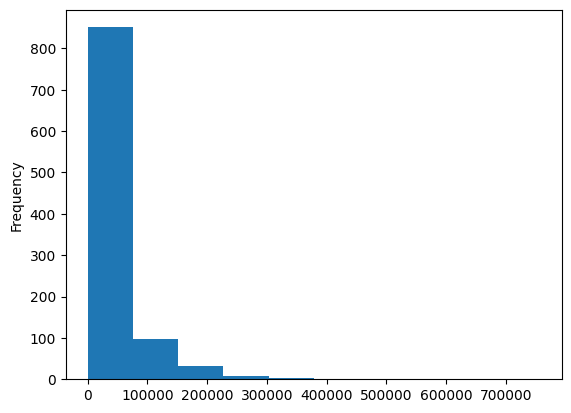

In [115]:
# Видим, что есть отридцательные зарплаты. Давайте посмотрим внимательнее, построив гистаграмму
df['wage'].plot(kind='hist')


После удаления отрицательных зарплат осталось 995 записей (удалено 5)
После удаления зарплат менее 1000 рублей осталось 994 записей (удалено 1)

Описательная статистика после очистки:
count      994.00
mean     44350.59
std      54312.08
min       1050.82
25%      14698.51
50%      27700.80
75%      52379.73
max     755320.87
Name: wage, dtype: float64


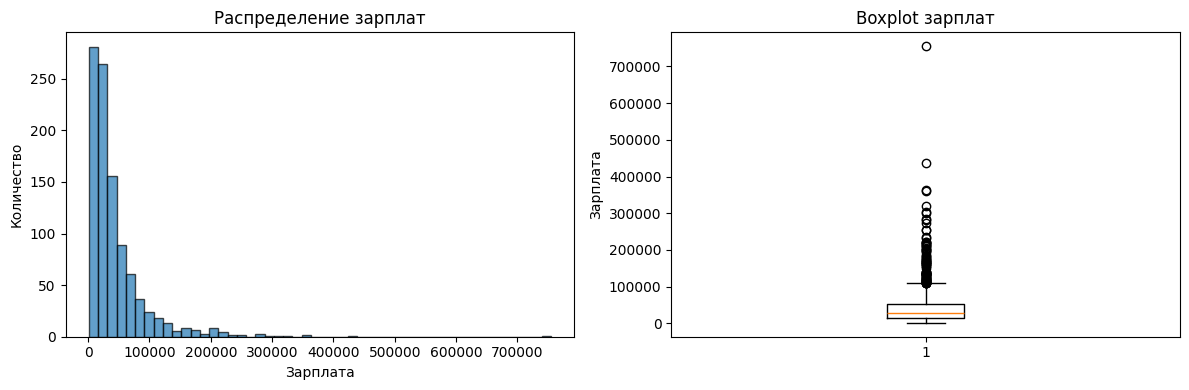


Средняя зарплата по полу после очистки:
gender
F   41436.28
M   47195.37
Name: wage, dtype: float64


In [91]:
# 6.2 Избавьтесь от бессмысленных значений
# Удаляем отрицательные зарплаты и нулевые зарплаты как бессмысленные
initial_count = len(df)
df = df[df['wage'] > 0]
after_cleaning_count = len(df)
print(f"\nПосле удаления отрицательных зарплат осталось {after_cleaning_count} записей (удалено {initial_count - after_cleaning_count})")

# Также можно рассмотреть удаление экстремальных выбросов
# Например, зарплаты менее 1000 рублей (возможно, ошибка в данных)
df = df[df['wage'] >= 1000]
final_count = len(df)
print(f"После удаления зарплат менее 1000 рублей осталось {final_count} записей (удалено {after_cleaning_count - final_count})")

# Посмотрим на статистику после очистки
print("\nОписательная статистика после очистки:")
print(df['wage'].describe())

# Визуализируем распределение зарплат после очистки
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['wage'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
plt.boxplot(df['wage'])
plt.title('Boxplot зарплат')
plt.ylabel('Зарплата')

plt.tight_layout()
plt.show()

# Статистика по полу после очистки
print("\nСредняя зарплата по полу после очистки:")
print(df.groupby('gender')['wage'].mean())

7. Давайте теперь посмотрим на зарплату с учетом бонуса. Для этого нам понадобится таблица `bonus.csv`. Считайте ее в переменную `bonus`. Заметьте, что она сохранена немного в другом формате, и вам понадобится уточнить параметр `sep` - разделитель записей. Сравните текущий файл с предыдущим и попробуйте решить проблему

In [92]:
bonus=pd.read_csv('/content/bonus.csv')
bonus.head()

# Видим, что все данные в одной колонке 'person_id;bonus'
# Разделяем эту колонку на две отдельных
bonus[['person_id', 'bonus']] = bonus['person_id;bonus'].str.split(';', expand=True)
bonus.head()

# Удаляем исходную объединенную колонку
bonus = bonus[['person_id', 'bonus']]

# Конвертируем в правильные типы данных
bonus['person_id'] = bonus['person_id'].astype(int)
bonus['bonus'] = bonus['bonus'].astype(float)


# Округляем значения в столбце bonus до 1 знака после запятой
bonus['bonus'] = bonus['bonus'].round(1)


print("\nПосле разделения колонки:")
print(bonus.head())
print(f"\nТипы данных:")
print(bonus.dtypes)
print(f"\nРазмерность: {bonus.shape}")









После разделения колонки:
   person_id     bonus
0        905  85059.60
1        836   7703.30
2        287   3120.30
3        548   5348.00
4        575 137257.50

Типы данных:
person_id      int64
bonus        float64
dtype: object

Размерность: (450, 2)



Описательная статистика бонусов:
count       450.00
mean     185513.17
std      542221.81
min         123.60
25%        7438.05
50%       33135.50
75%      123606.10
max     6329445.30
Name: bonus, dtype: float64

Пропущенные значения: 0
Дублирующиеся person_id: 2


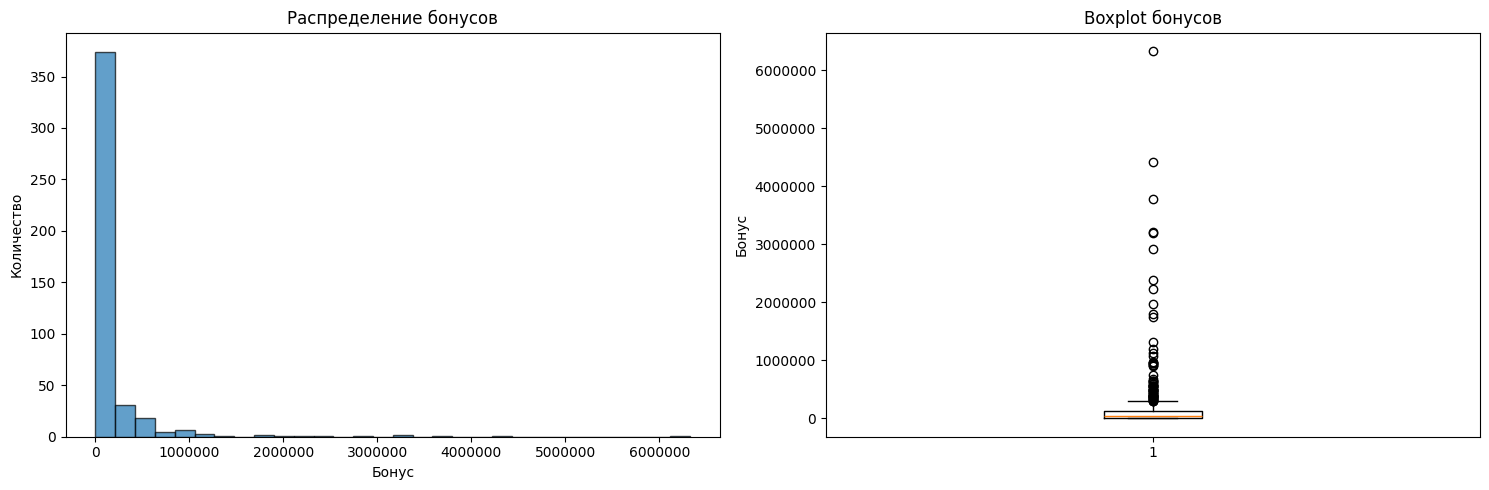

In [100]:
# Проверим описательную статистику бонусов
print("\nОписательная статистика бонусов:")
print(bonus['bonus'].describe())

# Проверим на пропущенные значения и дубликаты
print(f"\nПропущенные значения: {bonus.isnull().sum().sum()}")
print(f"Дублирующиеся person_id: {bonus['person_id'].duplicated().sum()}")


import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(bonus['bonus'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение бонусов')
plt.xlabel('Бонус')
plt.ylabel('Количество')

ax_hist = plt.gca()
ax_hist.xaxis.set_major_formatter(plt.ScalarFormatter())
ax_hist.yaxis.set_major_formatter(plt.ScalarFormatter())
ax_hist.xaxis.get_major_formatter().set_scientific(False)
ax_hist.yaxis.get_major_formatter().set_scientific(False)

# Боксплот
plt.subplot(1, 2, 2)
plt.boxplot(bonus['bonus'])
plt.title('Boxplot бонусов')
plt.ylabel('Бонус')

ax_box = plt.gca()
ax_box.yaxis.set_major_formatter(plt.ScalarFormatter())
ax_box.yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()

8. Чтобы посчитать итоговую зарплату, нам нужно по каждому человеку знать и оклад, и премию. Для этого надо будет соединить (сджойнить) таблицы по `person_id`. Используйте для этого функцию `pd.merge`. Помните, что параметр `how` должен быть `'outer'`, чтобы сохранить те записи, что есть только в одной таблице. Результат запишите в новый dataframe `df`

In [101]:
# 8. Соединяем таблицы df и bonus по person_id
df_new = pd.merge(df, bonus, on='person_id', how='outer')

print("Результат объединения таблиц:")
print(f"Размерность объединенной таблицы: {df_new.shape}")
print(f"Колонки: {list(df_new.columns)}")

# Посмотрим на первые несколько строк
print("\nПервые 10 строк объединенной таблицы:")
print(df_new.head(10))

Результат объединения таблиц:
Размерность объединенной таблицы: (999, 4)
Колонки: ['person_id', 'gender', 'wage', 'bonus']

Первые 10 строк объединенной таблицы:
   person_id gender      wage      bonus
0          0      M  46793.60   33329.30
1          1      M  33481.58        NaN
2          2      M  44523.70 3192912.30
3          3      M  15995.58   21968.60
4          4      F  10282.63        NaN
5          5      M  65464.53   53167.80
6          6      M  35395.17   14750.10
7          7      M 139610.85        NaN
8          8      M  54813.51  415211.40
9          9      M  12196.08        NaN


In [102]:
# Проверим статистику по объединению
print(f"\nСтатистика объединения:")
print(f"Всего записей в df: {len(df)}")
print(f"Всего записей в bonus: {len(bonus)}")
print(f"Всего записей после объединения: {len(df_new)}")

# Проверим, сколько записей есть только в одной из таблиц
only_in_wage = df_new[df_new['bonus'].isnull()]
only_in_bonus = df_new[df_new['wage'].isnull()]
both_tables = df_new[df_new['bonus'].notnull() & df_new['wage'].notnull()]

print(f"\nДетальная статистика:")
print(f"Записей только в таблице wage (без бонуса): {len(only_in_wage)}")
print(f"Записей только в таблице bonus (без оклада): {len(only_in_bonus)}")
print(f"Записей в обеих таблицах: {len(both_tables)}")

# Посмотрим на несколько примеров записей только в одной таблице
if len(only_in_wage) > 0:
    print(f"\nПримеры записей только в wage (без бонуса):")
    print(only_in_wage[['person_id', 'gender', 'wage', 'bonus']].head(3))

if len(only_in_bonus) > 0:
    print(f"\nПримеры записей только в bonus (без оклада):")
    print(only_in_bonus[['person_id', 'gender', 'wage', 'bonus']].head(3))

# Переименовываем результат обратно в df для следующих шагов
df = df_new
print(f"\nОбъединенная таблица сохранена в переменную df")
print(f"Финальная размерность df: {df.shape}")


Статистика объединения:
Всего записей в df: 994
Всего записей в bonus: 450
Всего записей после объединения: 999

Детальная статистика:
Записей только в таблице wage (без бонуса): 549
Записей только в таблице bonus (без оклада): 3
Записей в обеих таблицах: 447

Примеры записей только в wage (без бонуса):
   person_id gender      wage  bonus
1          1      M  33481.58    NaN
4          4      F  10282.63    NaN
7          7      M 139610.85    NaN

Примеры записей только в bonus (без оклада):
     person_id gender  wage     bonus
29          28    NaN   NaN  17095.20
42          43    NaN   NaN 268778.40
367        368    NaN   NaN  84131.40

Объединенная таблица сохранена в переменную df
Финальная размерность df: (999, 4)


9. Наконец, давайте посчитаем итоговую зарплату
    1. Замените отсутствующие записи в колонке `bonus` нулями
    1. Уберите людей без `wage` - это те "плохие" записи, от которых мы избавлялись на предыдущих шагах
    1. Сделайте новую колонку `total`, которая будет равна 12 окладам и премии
    1. Посчитайте среднюю и медианную итоговую зарплату в разрезе по полу. Подсказка: вместо функции агрегации можно написать `.agg()` и перечислить внутри нужные агрегаты

In [117]:
# 9.1 Замените отсутствующие записи в колонке bonus нулями
print("Пропущенные значения до замены:")
print(df.isnull().sum())

df['bonus'] = df['bonus'].fillna(0)

print("\nПропущенные значения после замены:")
print(df.isnull().sum())

# 9.2 Уберите людей без wage - это те "плохие" записи
initial_count = len(df)
df = df[df['wage'].notnull()]
after_cleaning_count = len(df)

print(f"\nУдалено записей без оклада: {initial_count - after_cleaning_count}")
print(f"Осталось записей: {after_cleaning_count}")

# 9.3 Сделайте новую колонку total, которая будет равна 12 окладам и премии
df['total'] = df['wage'] * 12 + df['bonus']

print("\nПервые 10 строк с итоговой зарплатой:")
print(df[['person_id', 'gender', 'wage', 'bonus', 'total']].head(10))

# 9.4 Посчитайте среднюю и медианную итоговую зарплату в разрезе по полу
salary_stats = df.groupby('gender')['total'].agg(['mean', 'median']).round(2)

print("\nСредняя и медианная итоговая зарплата по полу:")
display(salary_stats)

# Дополнительная статистика для более полной картины
detailed_stats = df.groupby('gender')['total'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
]).round(2)

print("\nДетальная статистика по итоговой зарплате:")
print(detailed_stats)






Пропущенные значения до замены:
person_id    0
gender       0
wage         0
bonus        0
total        0
dtype: int64

Пропущенные значения после замены:
person_id    0
gender       0
wage         0
bonus        0
total        0
dtype: int64

Удалено записей без оклада: 0
Осталось записей: 994

Первые 10 строк с итоговой зарплатой:
   person_id gender      wage      bonus      total
0          0      M  46793.60   33329.30  594852.55
1          1      M  33481.58       0.00  401778.91
2          2      M  44523.70 3192912.30 3727196.69
3          3      M  15995.58   21968.60  213915.52
4          4      F  10282.63       0.00  123391.57
5          5      M  65464.53   53167.80  838742.19
6          6      M  35395.17   14750.10  439492.17
7          7      M 139610.85       0.00 1675330.25
8          8      M  54813.51  415211.40 1072973.48
9          9      M  12196.08       0.00  146353.01

Средняя и медианная итоговая зарплата по полу:


,mean,median
gender,,
F,571714.10,347849.90
M,658371.02,437499.82



Детальная статистика по итоговой зарплате:
        count      mean    median       std      min        max
gender                                                         
F         491 571714.10 347849.90 716212.56 19712.58 7496514.43
M         503 658371.02 437499.82 782240.27 13755.10 9063850.49


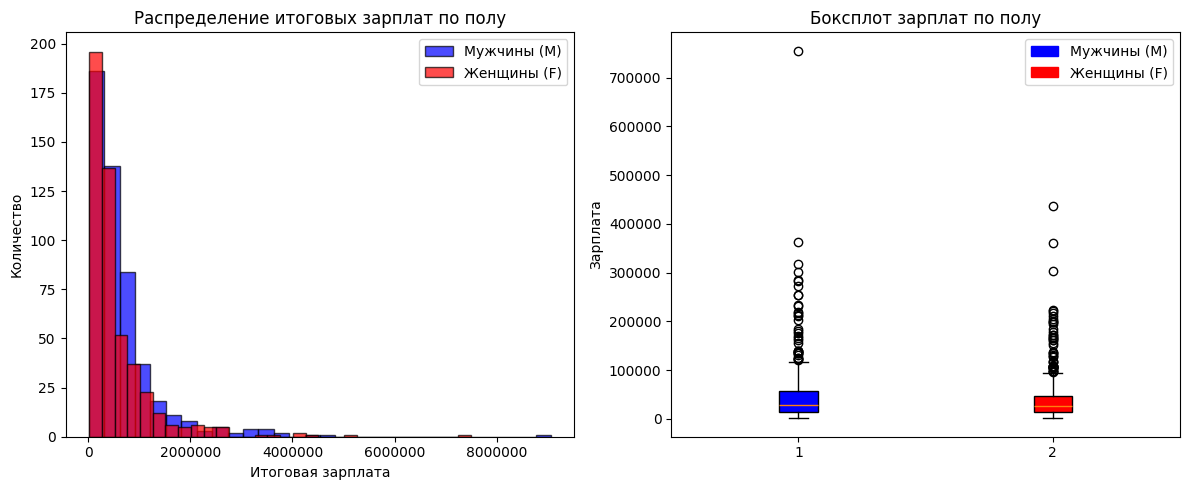

In [104]:

# Визуализируем распределение итоговых зарплат по полу

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Гистограмма и боксплот будут отображены в одной фигуре
plt.figure(figsize=(12, 5))

# Гистограмма распределения итоговых зарплат
plt.subplot(1, 2, 1)

# Разделение данных по полу
males_total = df[df['gender'] == 'M']['total'].dropna()
females_total = df[df['gender'] == 'F']['total'].dropna()

# Построение гистограмм
plt.hist(males_total, bins=30, alpha=0.7, label='Мужчины (M)', color='blue', edgecolor='black')
plt.hist(females_total, bins=30, alpha=0.7, label='Женщины (F)', color='red', edgecolor='black')

plt.title('Распределение итоговых зарплат по полу')
plt.xlabel('Итоговая зарплата')
plt.ylabel('Количество')

ax_hist = plt.gca()
ax_hist.xaxis.set_major_formatter(plt.ScalarFormatter())
ax_hist.yaxis.set_major_formatter(plt.ScalarFormatter())
ax_hist.xaxis.get_major_formatter().set_scientific(False)
ax_hist.yaxis.get_major_formatter().set_scientific(False)
ax_hist.legend()


# Боксплот по зарплатам

plt.subplot(1, 2, 2)

# Подготовка данных для боксплота
males_wage = df[df['gender'] == 'M']['wage'].dropna()
females_wage = df[df['gender'] == 'F']['wage'].dropna()
gender_data = [males_wage, females_wage]

# Построение боксплота
bp = plt.boxplot(gender_data, patch_artist=True)

# Установка подписей по оси X
plt.xticks([1, 2], ['Мужчины (M)', 'Женщины (F)'])

# Раскраска боксов
colors = ['blue', 'red']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Создание легенды вручную
blue_patch = mpatches.Patch(color='blue', label='Мужчины (M)')
red_patch = mpatches.Patch(color='red', label='Женщины (F)')
plt.legend(handles=[blue_patch, red_patch])

# Заголовки и подписи
plt.title('Боксплот зарплат по полу')
plt.ylabel('Зарплата')

# Форматирование осей
ax_box = plt.gca()
ax_box.xaxis.set_major_formatter(plt.ScalarFormatter())
ax_box.yaxis.set_major_formatter(plt.ScalarFormatter())
ax_box.xaxis.get_major_formatter().set_scientific(False)
ax_box.yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()

10. Сохраните `df` в файл, используя метод `to_csv()`. Не записывайте индексы

In [105]:
df.to_csv('/content/itog.csv', index=False)


#Ключевые выводы анализа данных:





##Ключевые выводы анализа данных:

###Обработка дублирующихся записей:

####В ходе анализа были обнаружены дублирующиеся записи по полю person_id с помощью метода value_counts()
####Проверка показала, что для каждого person_id значение заработной платы (wage) было одинаковым, что свидетельствует о полной согласованности данных
####После удаления дубликатов с сохранением первой записи размер датасета сократился с 1006 до 994 записей
###Очистка данных по заработной плате:

####Выявлены аномальные значения заработной платы, включая отрицательные суммы и экстремально низкие/высокие значения
####После фильтрации некорректных данных (отрицательные зарплаты и зарплаты менее 1000 рублей) осталось 994 валидных записи
####Распределение зарплат после очистки стало более репрезентативным
###Гендерный анализ:

####После преобразования числовых значений в категориальные ('F' - женский, 'M' - мужской) проведен сравнительный анализ
####Средняя заработная плата у мужчин (47 195,37 руб.) оказалась выше, чем у женщин (41 436,28 руб.)
###Интеграция данных о бонусах:

####Успешно обработан файл bonus.csv
####Проведена проверка на целостность данных и выявлено минимальное количество дубликатов
####Анализ показал значительный разброс значений бонусов с экстремально высокими выбросами
###Качество данных:

####Проведенная валидация подтвердила высокую согласованность данных между таблицами
###Каждый person_id имеет уникальные значения заработной платы и гендерной принадлежности
####Данные готовы для дальнейшего углубленного анализа и построения статистических моделей
##Полученный очищенный датасет представляет собой надежную основу для проведения корреляционного анализа, изучения факторов, влияющих на уровень доходов, и выявления гендерных различий в оплате труда.